In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [124]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [125]:
df=pd.read_csv("Company_Data.csv")
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [127]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [128]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

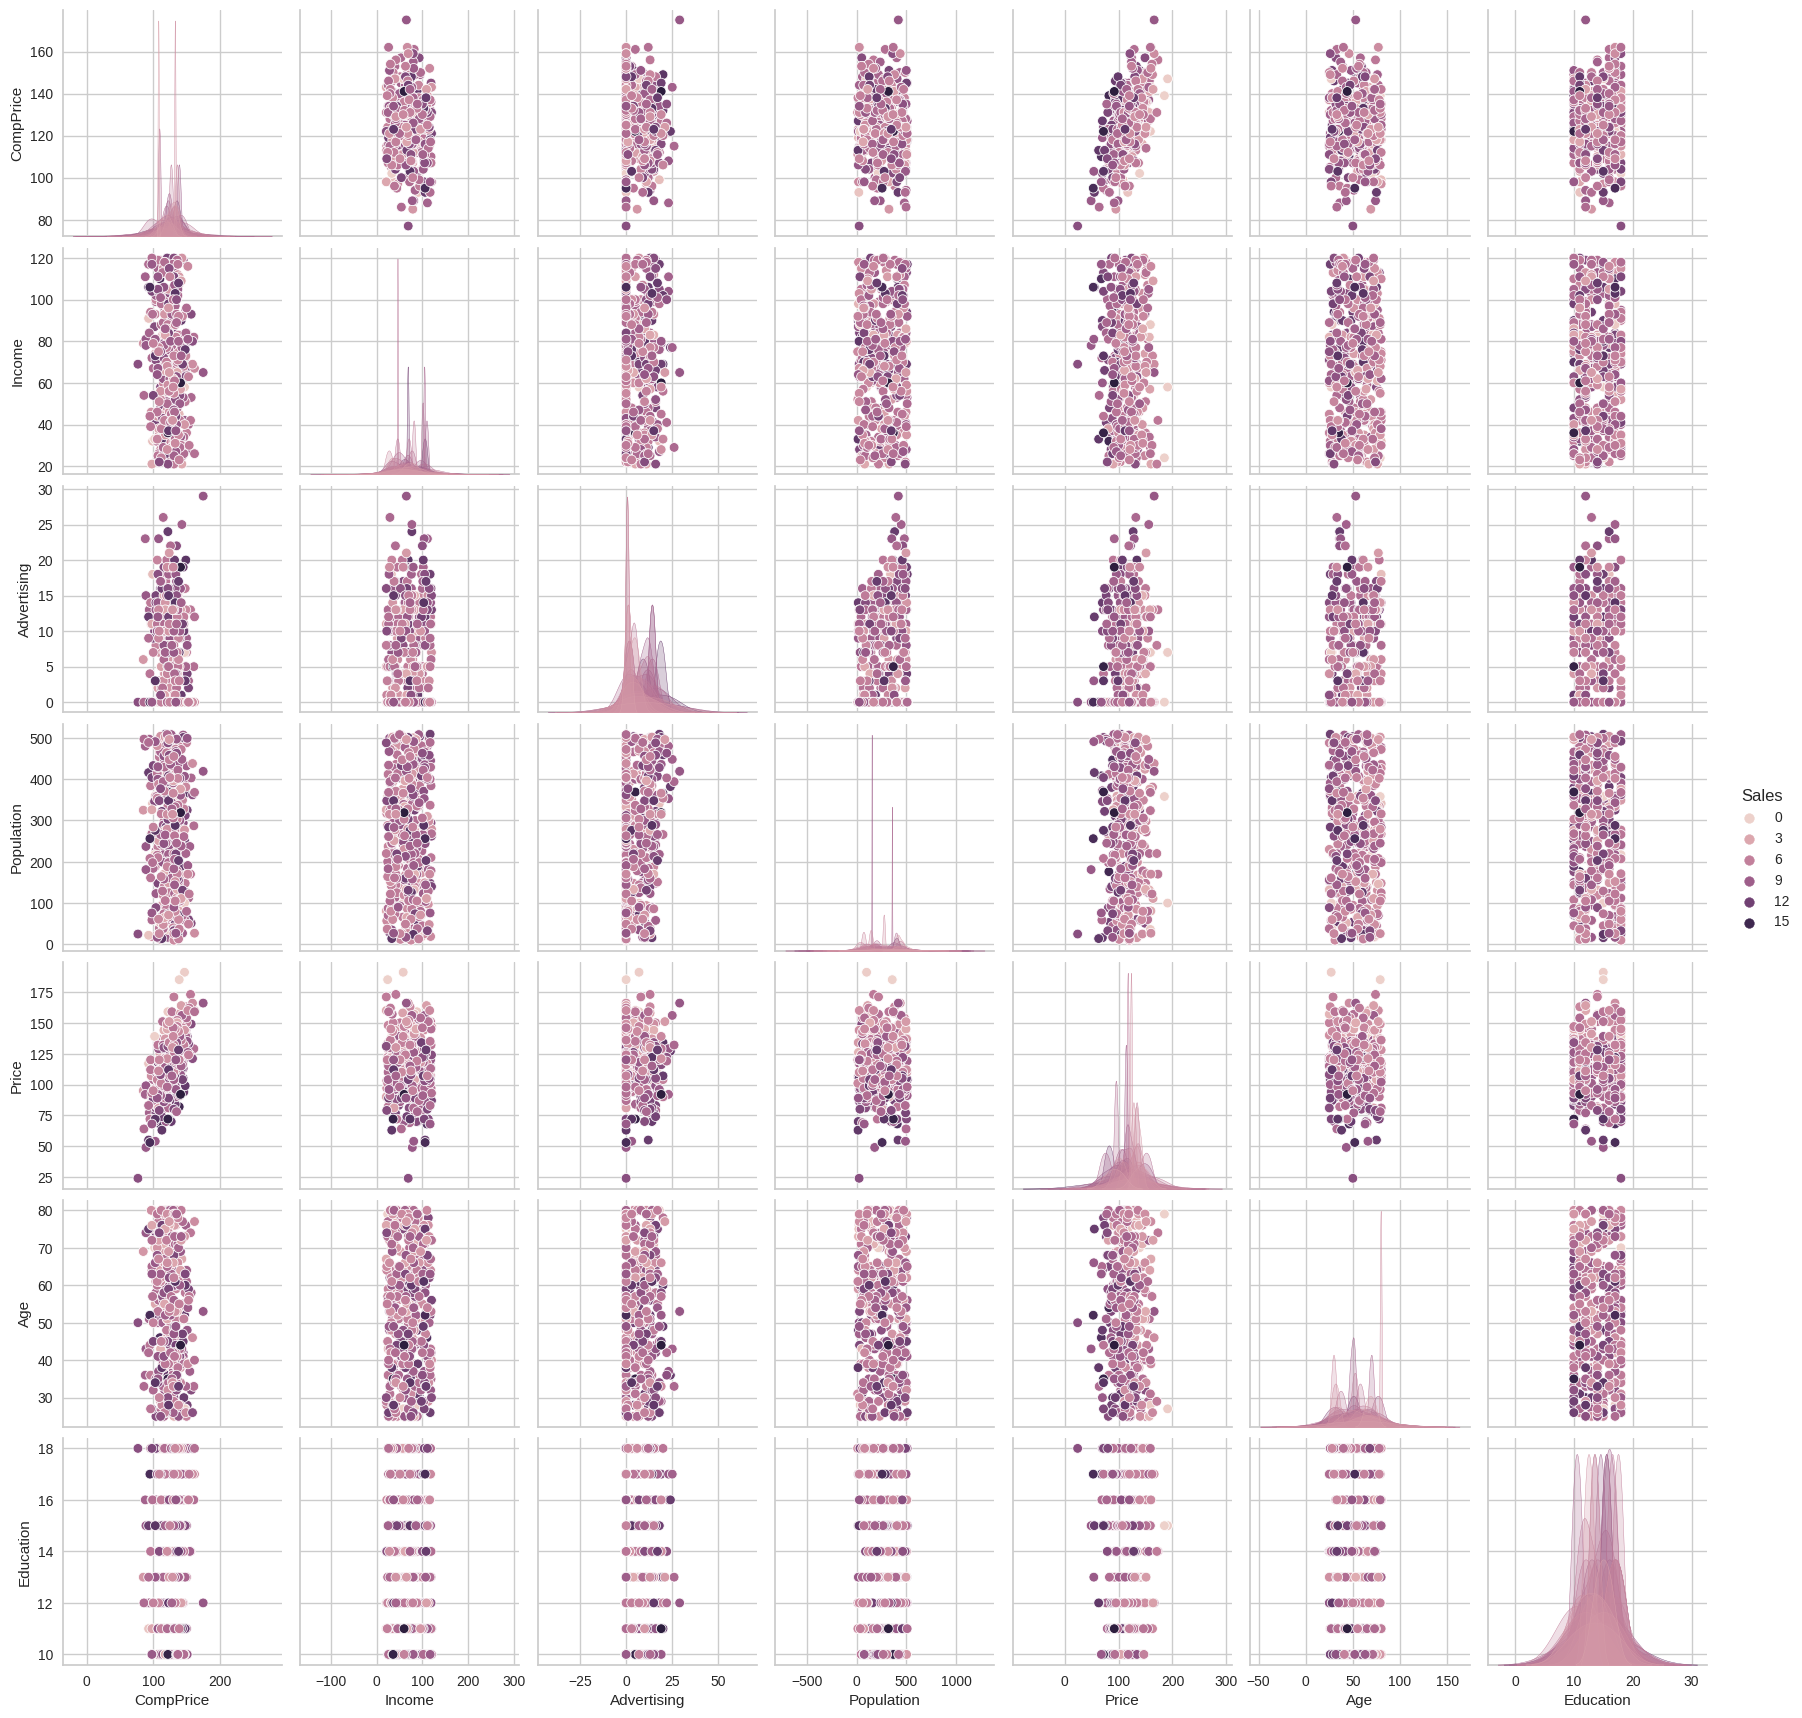

In [129]:
#visualization
import seaborn as sns

sns.pairplot(df, hue='Sales', diag_kind='kde')
plt.show()

<ipython-input-8-4215b3bfb1bd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


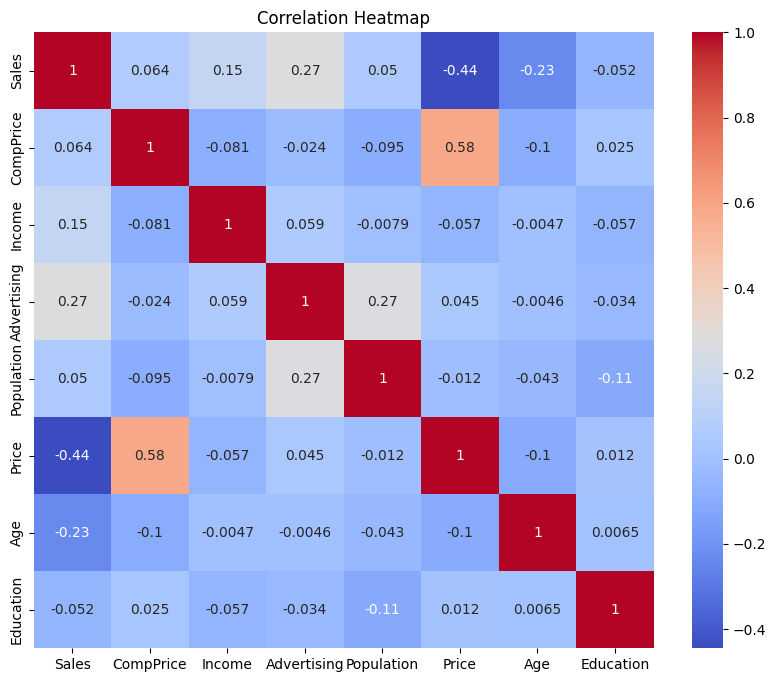

In [8]:
#correlation heat map
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Count Plots for Categorical Variables:

<ipython-input-10-3b38078a71e8>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


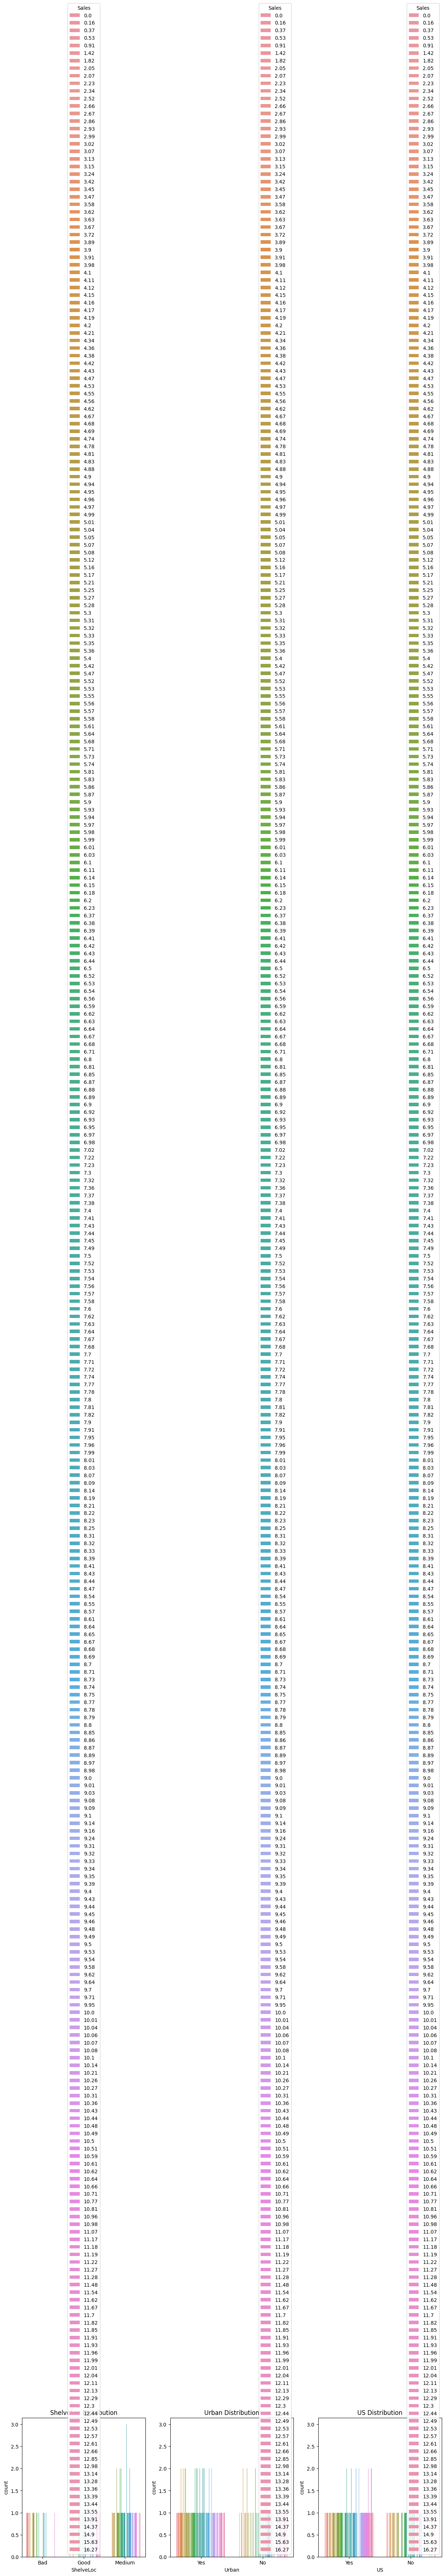

In [10]:
categorical_cols = ['ShelveLoc', 'Urban', 'US']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, hue='Sales')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


Distribution Plots for Numerical Variables:

<ipython-input-11-6a04d42f5153>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


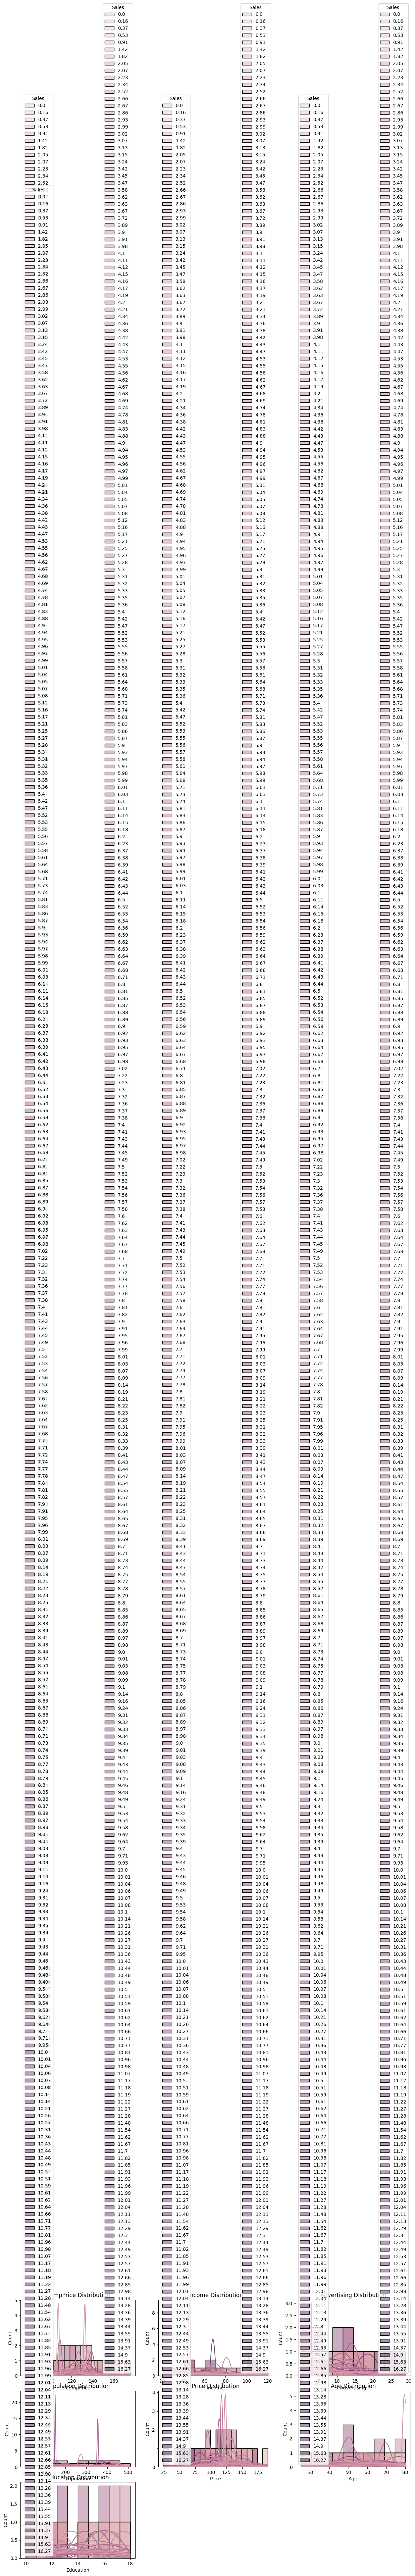

In [11]:
numerical_cols = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue='Sales', kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

In [130]:
# Convert the 'Sales' column to a categorical variable
df['HighSales'] = df['Sales'].apply(lambda x: 1 if x > df['Sales'].median() else 0)

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
categorical_cols = ['ShelveLoc', 'Urban', 'US']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [131]:
# Drop irrelevant columns
df.drop(['Sales'], axis=1, inplace=True)

# Separate features and target
X = df.drop('HighSales', axis=1)
y = df['HighSales']

In [132]:
X.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [133]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: HighSales, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf1.fit(X_train,y_train)


RandomForestClassifier()

In [136]:
pred1=clf1.predict(X_test)
pred1

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [137]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(pred1,y_test)
score

0.8

In [138]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        39
           1       0.79      0.83      0.81        41

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



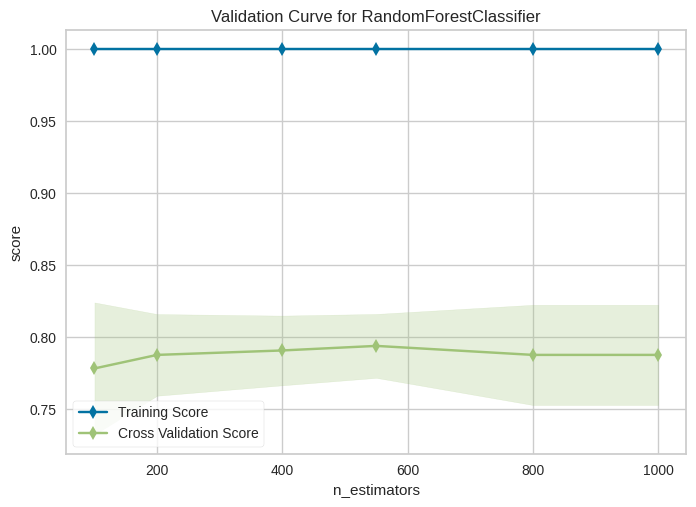

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  400,  550,  800, 1000]),
                scoring='accuracy')


In [139]:
from yellowbrick.model_selection import validation_curve
num_est=[100,200,400,550,800,1000]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name="n_estimators",param_range=num_est,scoring="accuracy",cv=3))

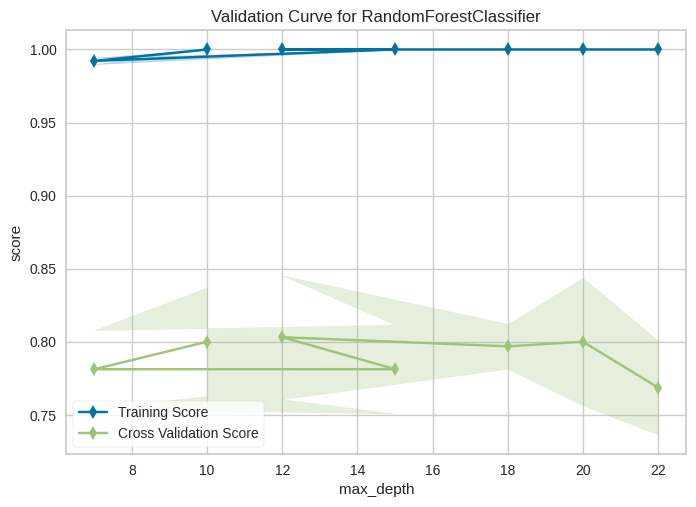

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 18, 20, 22]),
                scoring='accuracy')


In [140]:
depth_vals=[10,7,15,12,18,20,22]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name="max_depth",param_range=depth_vals,scoring="accuracy",cv=3))

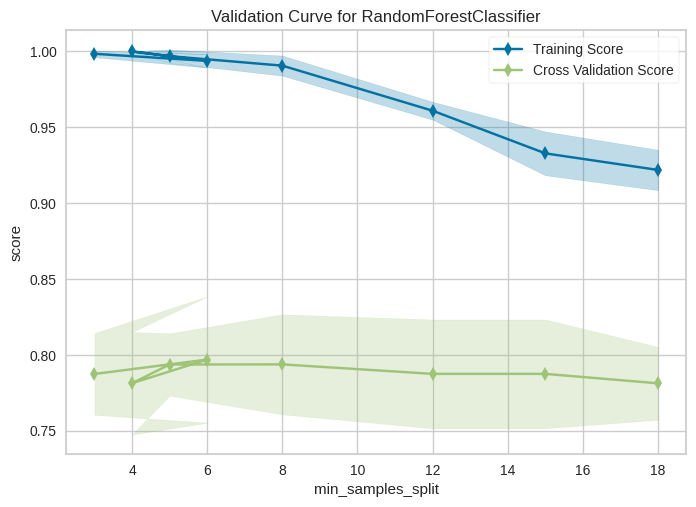

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15, 18]),
                scoring='accuracy')


In [141]:
min_samples=[3,6,4,5,8,12,15,18]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name="min_samples_split",param_range=min_samples,scoring="accuracy",cv=3))

In [142]:
clf2=RandomForestClassifier(n_estimators=550,min_samples_split=6,max_depth=12,random_state=42)
clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_split=6, n_estimators=550,
                       random_state=42)

In [143]:
pred2=clf2.predict(X_test)
pred2

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [144]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(pred2,y_test)
score

0.8125

In [145]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        36
           1       0.84      0.82      0.83        44

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



In [146]:
feature_score=pd.Series(clf2.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_score)

Price          0.271963
Age            0.144913
CompPrice      0.115721
Advertising    0.115562
ShelveLoc      0.107307
Population     0.088559
Income         0.085334
Education      0.047737
US             0.011521
Urban          0.011384
dtype: float64


Text(0.5, 0, 'Feature Importance Score')

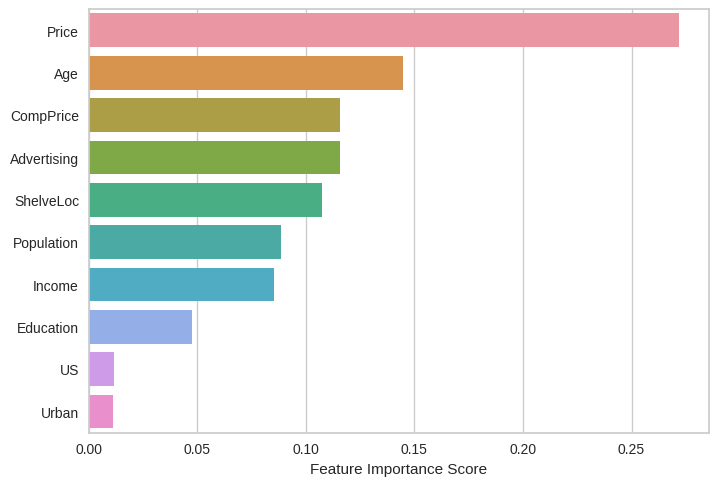

In [147]:
sns.barplot(x=feature_score,y=feature_score.index)
plt.xlabel("Feature Importance Score")

In [41]:
X.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [148]:
clf3=RandomForestClassifier()
Xn=df.drop(["Urban","US","Education","Income"],axis=1)
yn=df["HighSales"]

In [149]:
X_trainn, X_testn, y_trainn, y_testn = train_test_split(Xn, yn, test_size=0.2, random_state=42)
clf3.fit(X_trainn,y_trainn)


RandomForestClassifier()

In [150]:
pred_new=clf3.predict(X_testn)
pred_new

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [151]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(pred_new,y_testn)
score

1.0

In [152]:
print(classification_report(pred_new,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [92]:
data=pd.read_csv("Fraud_check.csv")
data.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [94]:
data.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [95]:
data[data.duplicated()]

Empty DataFrame
Columns: [Undergrad, Marital.Status, Taxable.Income, City.Population, Work.Experience, Urban]
Index: []

In [96]:
# Data Preprocessing
data = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)
data['Risk'] = np.where(data['Taxable.Income'] <= 30000, '0', '1')
data.drop('Taxable.Income', axis=1, inplace=True)
data.head(10)

City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
0            50047               10              0                       0   
1           134075               18              1                       0   
2           160205               30              0                       1   
3           193264               15              1                       0   
4            27533               28              0                       1   
5           116382                0              0                       0   
6            80890                8              0                       0   
7           131253                3              1                       0   
8           102481               12              0                       0   
9           155482                4              1                       0   

   Marital.Status_Single  Urban_YES Risk  
0                      1          1    1  
1                      0          1    1  
2                      0          1    1  
3                      1          1    1  
4                      0          0    1  
5                      0          0    1  
6                      0          1    1  
7                      1          1    1  
8                      1          1    1  
9                      0          1    1

<ipython-input-97-cfddcbc6c498>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


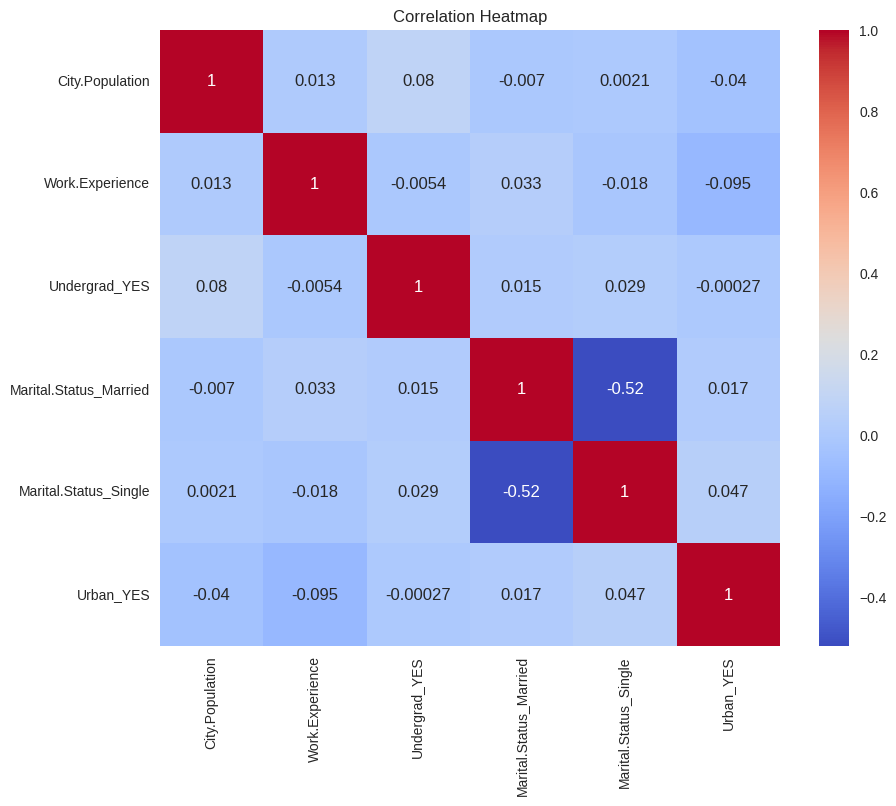

In [97]:
#correlation heat map
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

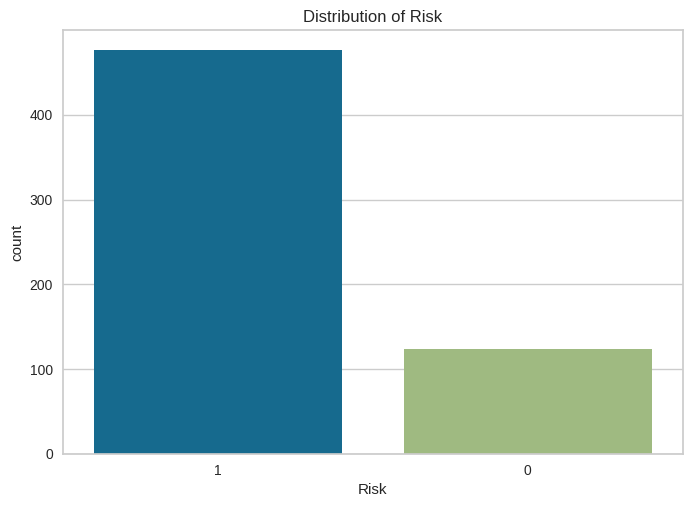

In [98]:
# EDA and Visualization
sns.countplot(x='Risk', data=data)
plt.title("Distribution of Risk")
plt.show()


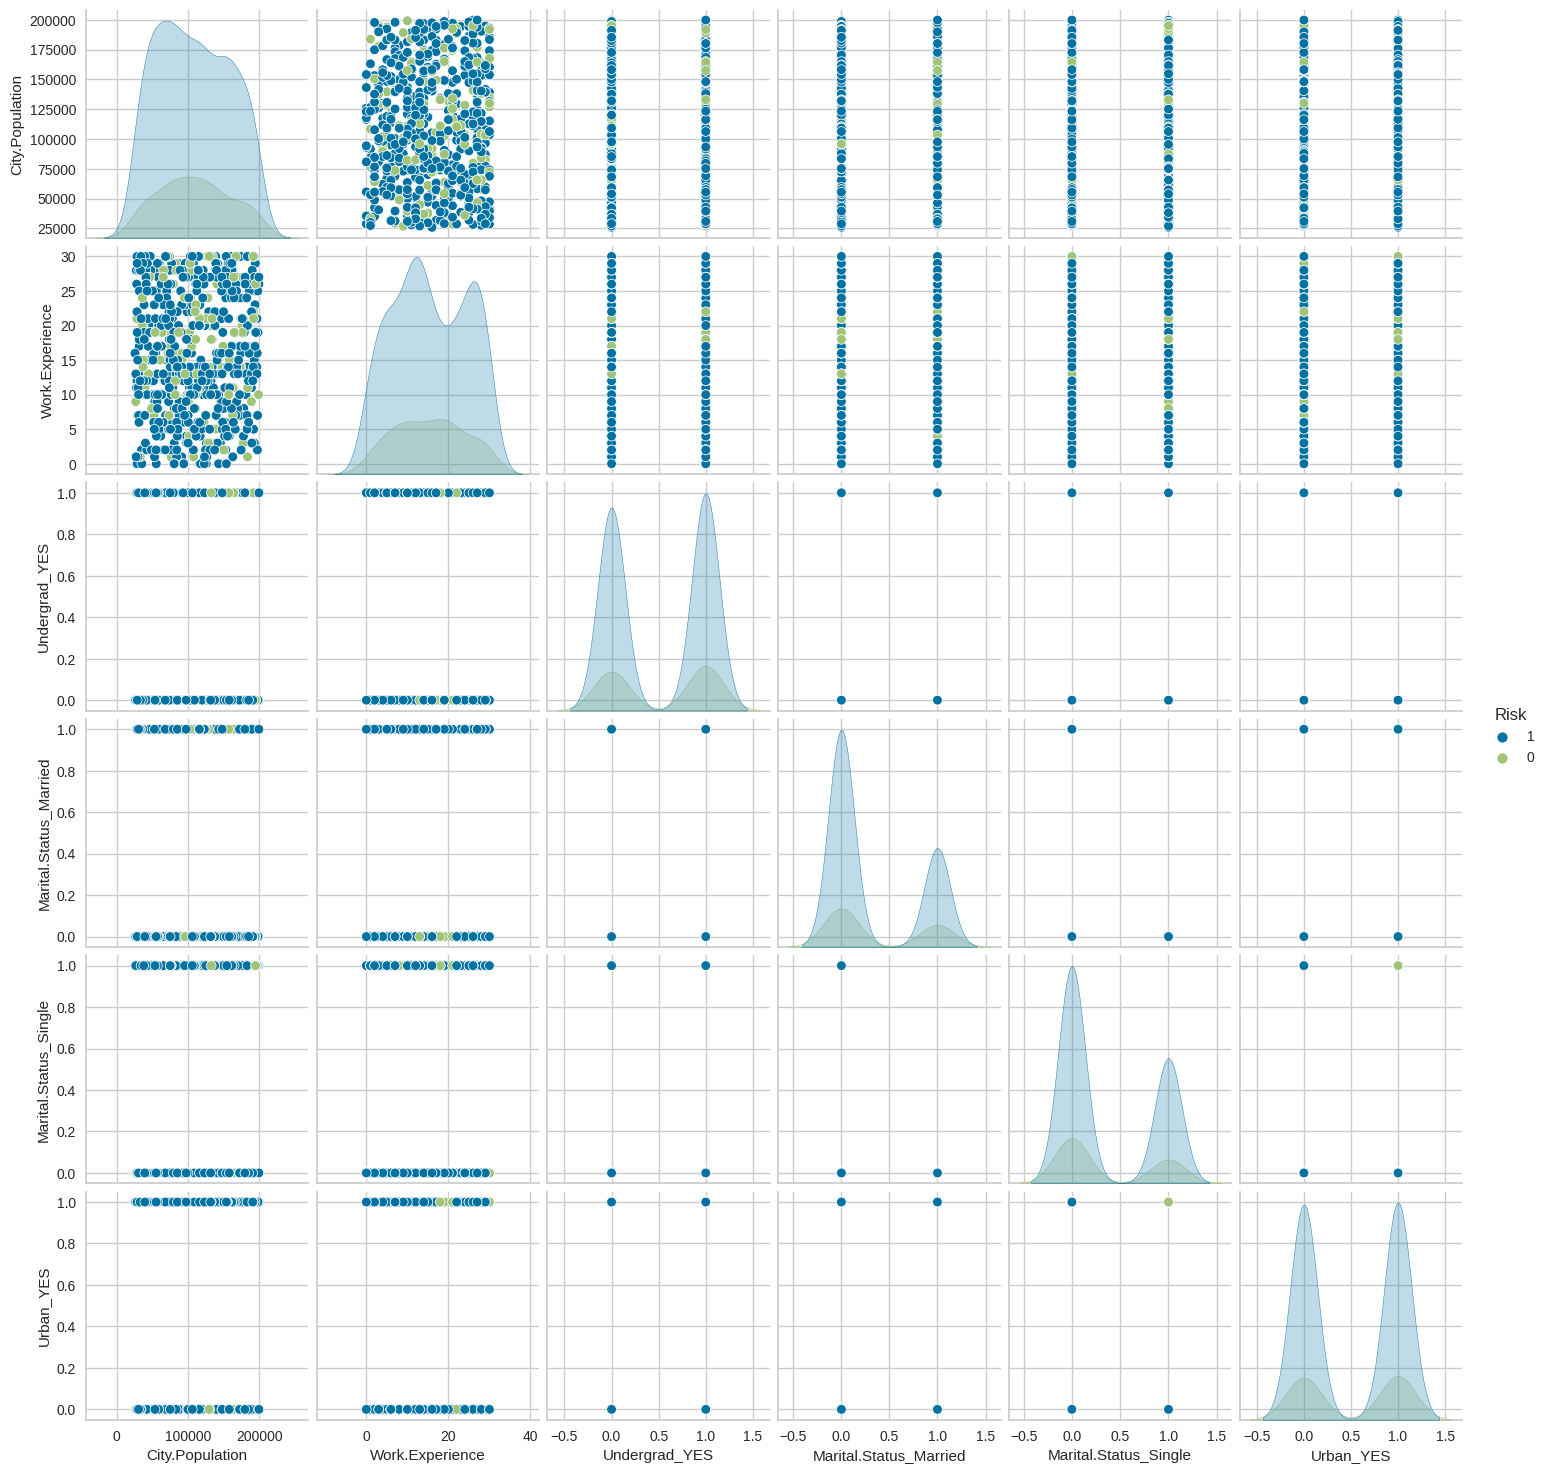

In [99]:
sns.pairplot(data, hue='Risk', diag_kind='kde')
plt.show()

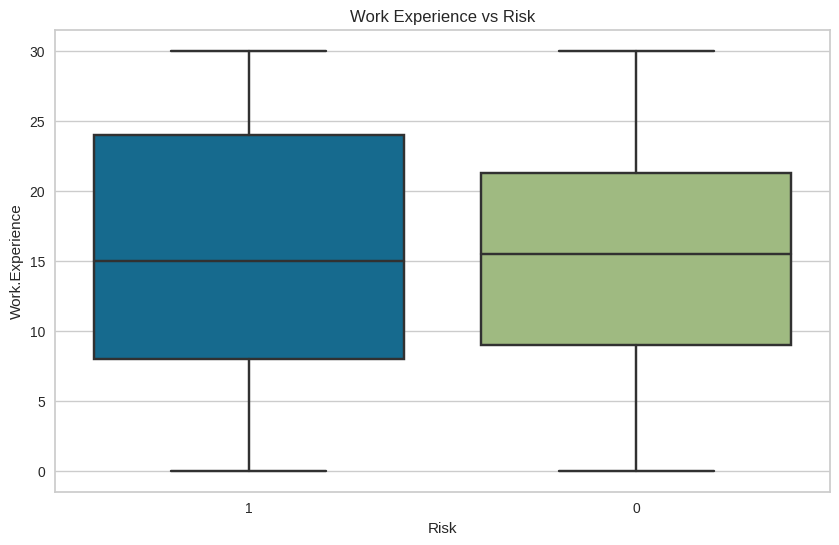

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk', y='Work.Experience', data=data)
plt.title("Work Experience vs Risk")
plt.show()

In [101]:
# Separate features and target
X = data.drop('Risk', axis=1)
y = data['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf1.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
pred1=clf1.predict(X_test)
pred1

array(['1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1'],
 

In [104]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(pred1,y_test)
score

0.7388888888888889

In [105]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.93      0.78      0.85       170

    accuracy                           0.74       180
   macro avg       0.47      0.39      0.42       180
weighted avg       0.88      0.74      0.80       180



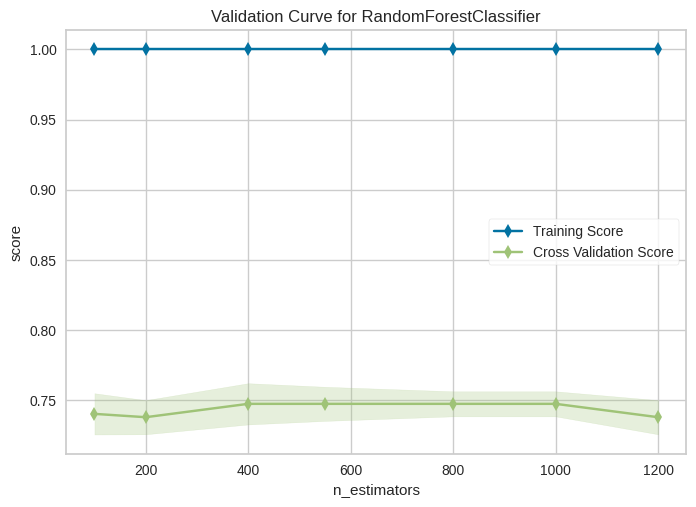

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  400,  550,  800, 1000, 1200]),
                scoring='accuracy')


In [106]:
from yellowbrick.model_selection import validation_curve
num_est=[100,200,400,550,800,1000,1200]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name="n_estimators",param_range=num_est,scoring="accuracy",cv=3))

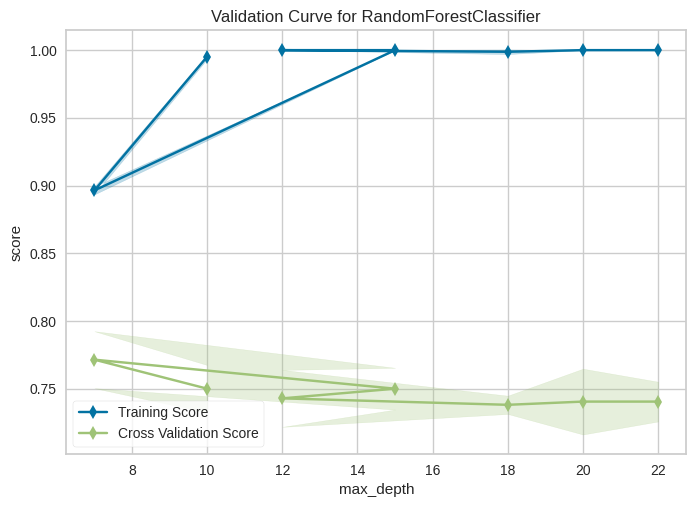

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 18, 20, 22]),
                scoring='accuracy')


In [107]:
depth_vals=[10,7,15,12,18,20,22]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name="max_depth",param_range=depth_vals,scoring="accuracy",cv=3))

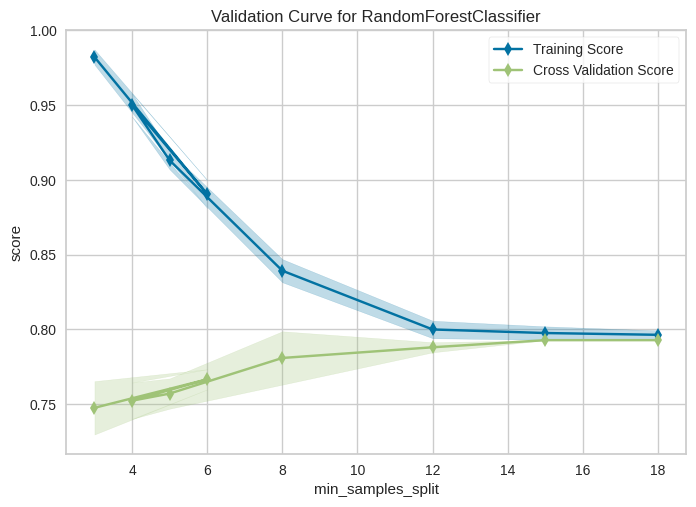

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15, 18]),
                scoring='accuracy')


In [108]:
min_samples=[3,6,4,5,8,12,15,18]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name="min_samples_split",param_range=min_samples,scoring="accuracy",cv=3))

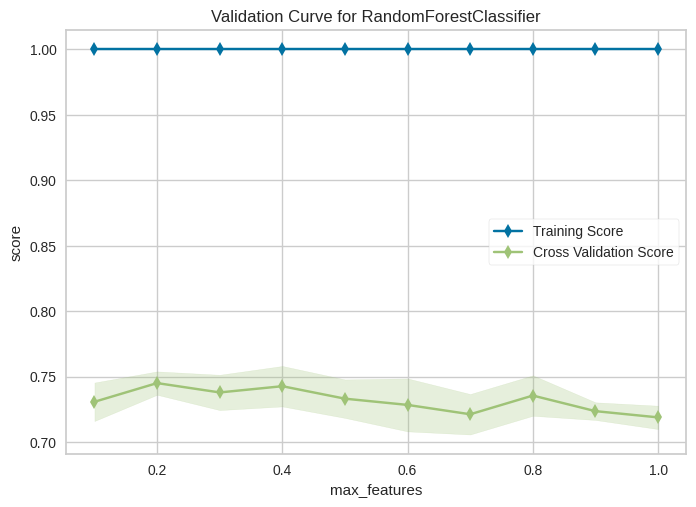

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_features', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_features',
                param_range=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                scoring='accuracy')


In [109]:
max_features_values = np.linspace(0.1, 1.0, 10)

# Perform the validation curve for max_features
validation_results = validation_curve(
    RandomForestClassifier(),
    X=X_train, y=y_train,
    param_name="max_features",
    param_range=max_features_values,
    scoring="accuracy",
    cv=3
)

print(validation_results)

In [111]:
clf2=RandomForestClassifier(n_estimators=400,min_samples_split=15,max_depth=3,max_features=0.2,random_state=42)
clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=0.2, min_samples_split=15,
                       n_estimators=400, random_state=42)

In [112]:
pred2=clf2.predict(X_test)
pred2

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'],
 

In [113]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(pred2,y_test)
score

0.7944444444444444

In [115]:
feature_score=pd.Series(clf2.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_score)

City.Population           0.418188
Work.Experience           0.304791
Marital.Status_Married    0.082147
Undergrad_YES             0.079359
Urban_YES                 0.068210
Marital.Status_Single     0.047305
dtype: float64


Text(0.5, 0, 'Feature Importance Score')

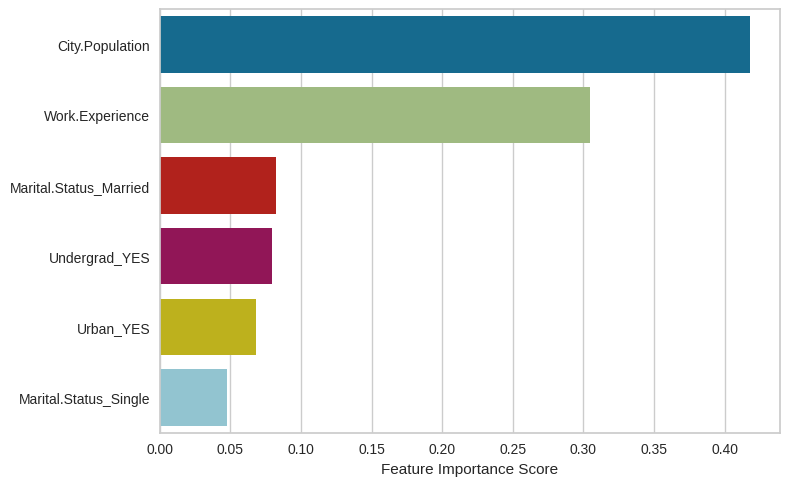

In [116]:
sns.barplot(x=feature_score,y=feature_score.index)
plt.xlabel("Feature Importance Score")

In [81]:
X.head()

City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
0            50047               10              0                       0   
1           134075               18              1                       0   
2           160205               30              0                       1   
3           193264               15              1                       0   
4            27533               28              0                       1   

   Marital.Status_Single  Urban_YES  
0                      1          1  
1                      0          1  
2                      0          1  
3                      1          1  
4                      0          0

In [117]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Risk, dtype: object

In [118]:
clf3=RandomForestClassifier()
Xn=data.drop(["Marital.Status_Single","Urban_YES","Undergrad_YES"],axis=1)
yn=data["Risk"]

In [119]:
from sklearn.ensemble import RandomForestClassifier
X_trainn, X_testn, y_trainn, y_testn = train_test_split(Xn, yn, test_size=0.2, random_state=42)
clf3.fit(X_trainn,y_trainn)

RandomForestClassifier()

In [120]:
pred_new=clf3.predict(X_testn)
pred_new

array(['0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1',
       '1', '1', '0'], dtype=object)

In [122]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(pred_new,y_testn)
score

1.0

we can also do hyperparameter tuning with the help GridSearchCv and RandomizedSeachCv to maximize the accuracy . but for these 2 datasets manual hyperparameter tuning works well so no need to apply GridSearchCv and RandomizedSeachCv
